In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from password import password

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
protocol = 'postgresql'
username = 'postgres'
password = password
host = 'localhost'
port = 5432
database_name = 'churn_pred'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)
connection = engine.connect()

In [3]:
df = pd.read_sql("SELECT * FROM fact_churn", connection)
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0,1,0,0,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,1,0,1,0,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,1,1,0,0,0


In [4]:
# Split the data into X_train, X_test, y_train, y_test
X = df.drop(['churn'], axis=1)
y = df['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.sample(5)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
3470,93,0,168.4,114,28.63,276.0,127,23.46,196.2,48,8.83,11.4,3,3.08,1,0,1,1,0
4895,77,0,175.8,116,29.89,156.2,125,13.28,237.4,106,10.68,5.0,4,1.35,0,1,0,0,0
946,110,0,74.5,117,12.67,200.8,98,17.07,192.2,101,8.65,9.8,7,2.65,3,0,0,0,0
13,55,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3,0,0,0,1
3774,94,0,200.2,113,34.03,128.9,116,10.96,278.9,109,12.55,10.4,5,2.81,0,1,0,0,0


k: 1, Train/Test Score: 1.000/0.776
k: 3, Train/Test Score: 0.896/0.815
k: 5, Train/Test Score: 0.876/0.828
k: 7, Train/Test Score: 0.867/0.832
k: 9, Train/Test Score: 0.865/0.831
k: 11, Train/Test Score: 0.857/0.828
k: 13, Train/Test Score: 0.856/0.826
k: 15, Train/Test Score: 0.854/0.826
k: 17, Train/Test Score: 0.850/0.828
k: 19, Train/Test Score: 0.847/0.829


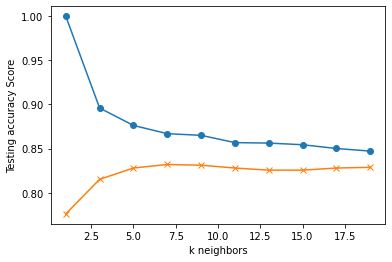

In [5]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()